***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [339]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [340]:
dados = pd.read_csv('dados.csv')
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Visualize o conteúdo do DataFrame

In [341]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [342]:
dados.Renda.max()

200000

### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [343]:
classes = [dados.Renda.min(), 2*788, 5*788, 15*788, 25*788, dados.Renda.max()]

### 2º Definir os labels das classes

In [344]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [345]:
frequencia = pd.value_counts(pd.cut(x= dados.Renda,
      bins=classes,
      labels = labels,
      include_lowest= True))
frequencia

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [346]:
percentual = pd.value_counts(pd.cut(x= dados.Renda,
      bins=classes,
      labels = labels,
      include_lowest= True),
    normalize = True)
percentual

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [347]:
distribuicao_frequencia = pd.DataFrame({'Frequência': frequencia, 'Porcentagem (%)': percentual})

In [348]:
distribuicao_frequencia.sort_index(ascending = False)

,Frequência,Porcentagem (%)
A,420,0.005466
B,822,0.010698
C,7241,0.094235
D,18602,0.242087
E,49755,0.647514


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

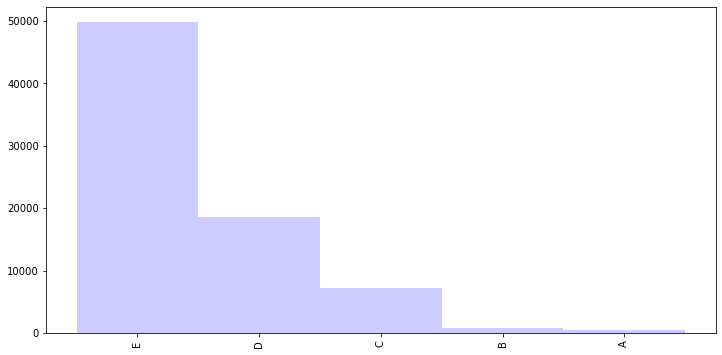

In [349]:
distribuicao_frequencia['Frequência'].plot.bar(width =1, color='blue', alpha=0.2, figsize=(12,6))

> ### Conclusões

Quase 60% das pessoas tem uma renda de até 2 salario minimo. Que no caso pertencem a renda E

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - ALTURA'}, xlabel='Metros', ylabel='Density'>

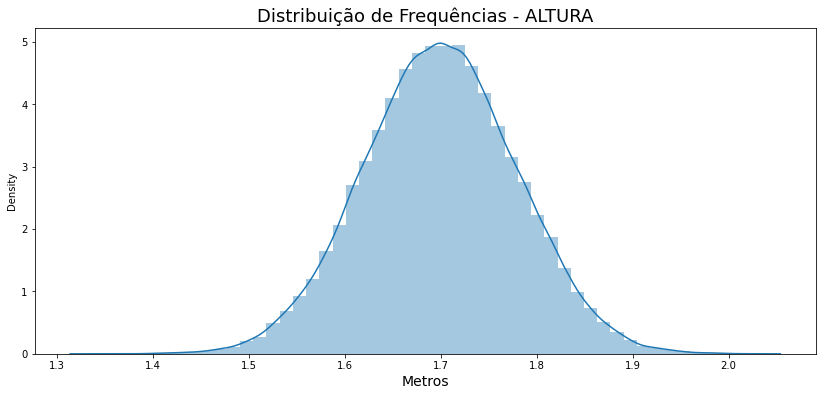

In [395]:
ax = sns.distplot(dados['Altura'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - ALTURA', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de freqûencias - Anos de Estudo'}, xlabel='Anos', ylabel='Density'>

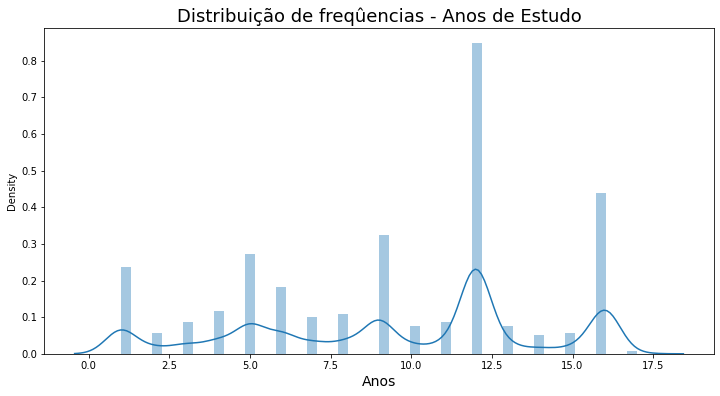

In [406]:
ax = sns.distplot(dados['Anos de Estudo'])

ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de freqûencias - Anos de Estudo", fontsize = 18)
ax.set_xlabel('Anos', fontsize = 14)
ax

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências - RENDA'}, xlabel='R$', ylabel='Density'>

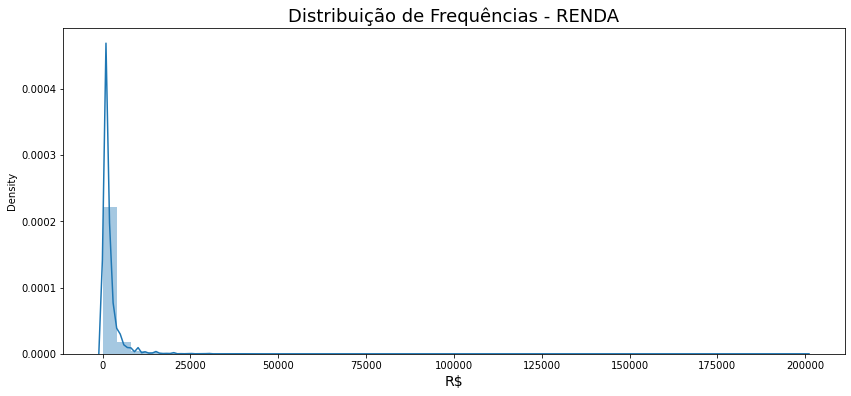

In [396]:
ax = sns.distplot(dados['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Primeiro grafico retrata a altura da população que segue uma distribuição normal

Segundo grafico, retrata anos de estudo que visualizando a maioria das pessoas estudam muito durante 12 anos

Terceiro grafico retrata a renda, que visualizando a  maioria das pessoas ganham em torno de 1SM

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

<AxesSubplot:title={'center':'Distribuição de Renda menor que 20SM - Renda'}, xlabel='Renda', ylabel='Density'>

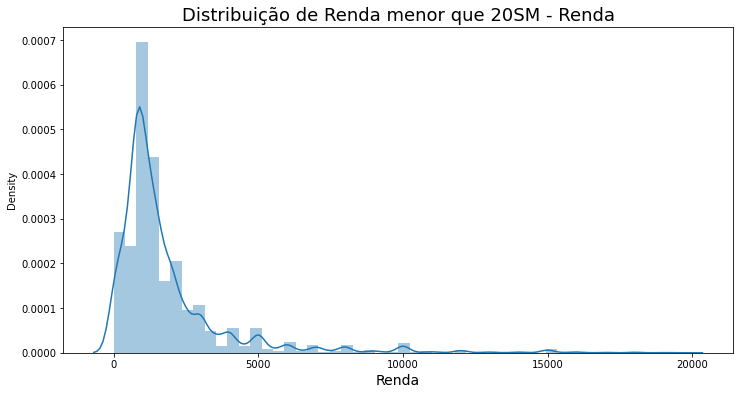

In [405]:
ax = sns.distplot(dados.query('Renda < 20000')['Renda'])

ax.figure.set_size_inches(12,6)
ax.set_title("Distribuição de Renda menor que 20SM - Renda", fontsize = 18)
ax.set_xlabel('Renda', fontsize = 14)
ax


### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [354]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [355]:
# Criando um cruzamento dos dados sexo x cor
frequencia = pd.crosstab(dados.Sexo,
           dados.Cor)

In [356]:
# ALterando o nome dos rotulos
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)

In [357]:
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [358]:
# Criando a tabela porcentagem com as frequencias normalizadas e mudando o nome dos rotulos 
porcentagem = pd.crosstab(dados.Sexo,
           dados.Cor,
           normalize= True) *100
porcentagem.rename(index = sexo, inplace=True)
porcentagem.rename(columns = cor, inplace=True)

In [359]:
porcentagem

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


In [360]:
# Criando a tabela porcentagem com as frequencias normalizadas e mudando o nome dos rotulos 
porcentagem = pd.crosstab(dados.Sexo,
           dados.Cor,
          aggfunc ='mean',
          values = dados.Renda)
porcentagem.rename(index = sexo, inplace=True)
porcentagem.rename(columns = cor, inplace=True)
porcentagem

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


> ### Conclusões

Tabela frequencia podemos visualizar que a quantidade de pessoas brancas e pardas sao superiores e a maior concentração é de homem.

Na ultima tabela porcentagem realizamos a função media da renda de cada raçae podemos ver que pessoas brancas e amarelas tem renda superiores as demais 

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [361]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [362]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [363]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [364]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [365]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [366]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [386]:
# Criando a tabela frequencia de sexo cor utlizando como parametro a renda. E assim observando os valores medio, mediana e maximo
frequencia = pd.crosstab(dados.Cor,
           dados.Sexo,
          aggfunc ={'mean', 'median','max'},
          values = dados.Renda)
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)
frequencia

max                   mean                median          
Sexo      Feminino Masculino     Feminino    Masculino Feminino Masculino
Cor                                                                      
Amarela    20000.0   50000.0  3027.341880  4758.251064   1500.0    2800.0
Branca    100000.0  200000.0  2109.866750  2925.744435   1200.0    1700.0
Indígena  120000.0   10000.0  2464.386139  1081.710938    788.0     797.5
Parda      30000.0  100000.0  1176.758516  1659.577425    800.0    1200.0
Preta      23000.0   50000.0  1134.596400  1603.861687    800.0    1200.0

> ### Conclusões

Podemos observar valor maximo na qual a raça **braca** ganha com superioridade as demais, a media  segue mesma linha de superioridade dos brancos, porem a mediana observamos que a raça **Parda** e **Preta** sao iguais e a raça **amarela** tem a mediana maior que da **branca**

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [387]:
# Criando a tabela frequencia de sexo cor utlizando como parametro a renda. E assim observando os valores,
# desvio medio absoluto, variancia e desvio padrao
frequencia = pd.crosstab(dados.Cor,
           dados.Sexo,
          aggfunc ={'mad', 'var','std'},
          values = dados.Renda)
frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns = cor, inplace=True)
frequencia

mad                        std                        var  \
Sexo         Feminino    Masculino      Feminino    Masculino      Feminino   
Cor                                                                           
Amarela   2549.146322  3709.597211   3731.173660  5740.824820  1.392166e+07   
Branca    1670.967106  2261.012346   3251.013154  4750.791872  1.056909e+07   
Indígena  3007.892952   798.910889  11957.498292  1204.093490  1.429818e+08   
Parda      811.580946  1125.827704   1596.233048  2312.087184  2.547960e+06   
Preta      705.453357   975.602482   1349.799809  1936.309271  1.821960e+06   

                        
Sexo         Masculino  
Cor                     
Amarela   3.295707e+07  
Branca    2.257002e+07  
Indígena  1.449841e+06  
Parda     5.345747e+06  
Preta     3.749294e+06

> ### Conclusões

Podemos observar que a raça indigiena sexo feminno tem um desvio medio absoluto maior. E do sexo masculino a raça Amarela 

No desvio padrao a raça indigena do sexo feminino é a maior junto com raça amarela sexo masculino 

Já a variância as raça Parda sexo masculino é maior. 

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Cor'>

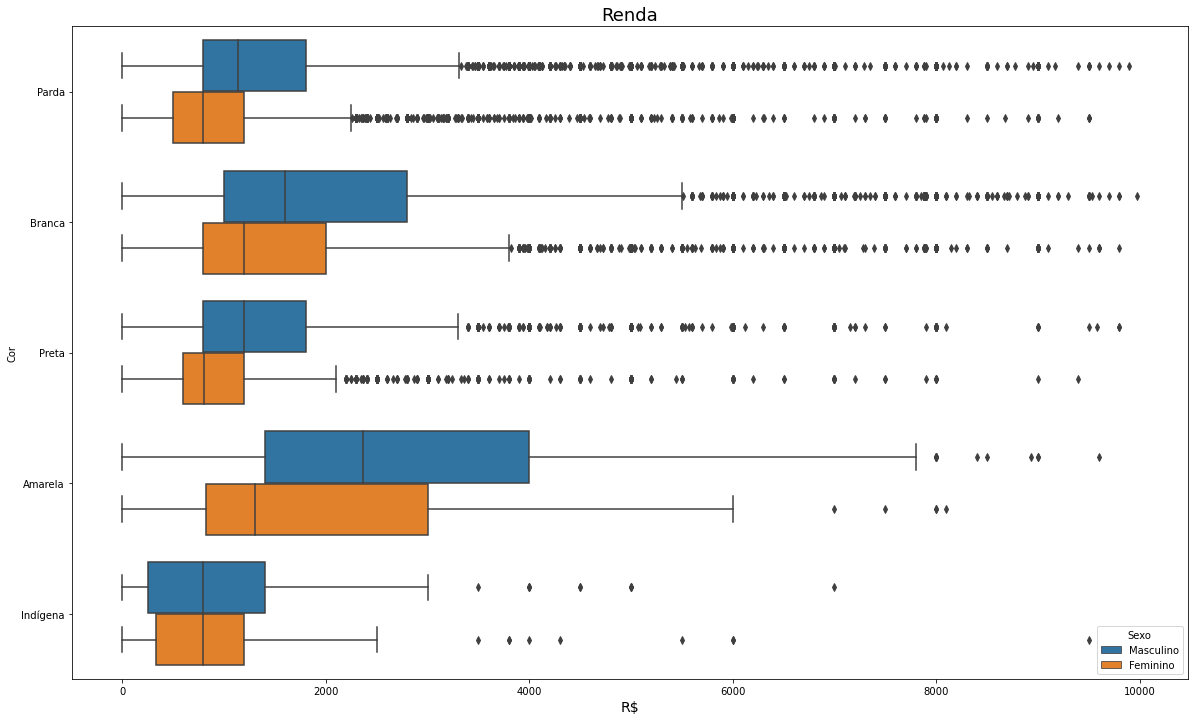

In [385]:
#Plotando boxplot da renda, porem abaixo dos 10mil e divido por sexo
ax = sns.boxplot(x= 'Renda', y='Cor', hue='Sexo', data= dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(20,12)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

In [370]:
cor

{0: 'Indígena',
 2: 'Branca',
 4: 'Preta',
 6: 'Amarela',
 8: 'Parda',
 9: 'Sem declaração'}

> ### Conclusões

Que ambos o sexo da raça Amarela tem maior renda abaixo dos 10mil

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [388]:
from scipy import stats

stats.percentileofscore(dados.Renda, 788, kind='weak')

28.86777719937533

Nesse caso 28% ganha ate um salário minimo

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [372]:
dados.Renda.quantile([0.99])

0.99    15000.0
Name: Renda, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [390]:
frequencia = pd.crosstab(dados['Anos de Estudo'],
                        dados.Sexo,
                        aggfunc = {'mean', 'median', 'max', 'std'},
                        values = dados.Renda)
frequencia.rename(index = anos_de_estudo, inplace =True)
frequencia

max                   mean               \
Sexo                            Feminino Masculino     Feminino    Masculino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   10000.0   30000.0   516.201748   799.494638   
1 ano                             2000.0   30000.0   492.771987   895.629047   
2 anos                            4000.0   40000.0   529.911638   931.178986   
3 anos                            3500.0   80000.0   546.853916  1109.203862   
4 anos                           10000.0   50000.0   704.279111  1302.329283   
5 anos                            8000.0   35000.0   781.389776  1338.653218   
6 anos                            6000.0   25000.0   833.732824  1448.875419   
7 anos                            9000.0   40000.0   830.751004  1465.497940   
8 anos                           18000.0   30000.0   933.615351  1639.396667   
9 anos                           20000.0   60000.0   868.021700  1508.038850   
10 anos                           6000.0   45000.0   925.919225  1731.270847   
11 anos                         100000.0  200000.0  1286.790889  2117.060504   
12 anos                         120000.0   30000.0  1682.313725  2470.330776   
13 anos                          20000.0   25000.0  1911.730047  3195.099154   
14 anos                          20000.0   50000.0  2226.460457  3706.620269   
15 anos ou mais                 100000.0  200000.0  3899.513231  6134.279790   
Não determinados                  3000.0    7000.0   798.174419  1295.761905   

                                 median                    std               
Sexo                           Feminino Masculino     Feminino    Masculino  
Anos de Estudo                                                               
Sem instrução e menos de 1 ano    390.0     700.0   639.311534  1023.904884  
1 ano                             400.0     788.0   425.291842  1331.950552  
2 anos                            450.0     788.0   498.234168  1435.173827  
3 anos                            500.0     800.0   424.124446  2143.800133  
4 anos                            788.0    1000.0   629.553397  1419.821787  
5 anos                            788.0    1045.0   635.782641  1484.650587  
6 anos                            788.0    1200.0   574.547028  1476.628602  
7 anos                            788.0    1200.0   602.038029  1419.708673  
8 anos                            800.0    1300.0   896.781213  1515.583715  
9 anos                            788.0    1200.0   973.221652  2137.664774  
10 anos                           800.0    1218.0   620.611907  2078.609734  
11 anos                          1000.0    1500.0  1819.040417  2676.538942  
12 anos                          1200.0    1800.0  4851.833513  2268.081538  
13 anos                          1300.0    2400.0  2053.789771  2797.116800  
14 anos                          1600.0    2500.0  2064.083336  3987.214974  
15 anos ou mais                  2800.0    4000.0  4212.770709  7447.613594  
Não determinados                  788.0    1200.0   459.985964   979.648745

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Renda segundo Anos de Estudo com pessoas de idade abaixo dos 40'}, xlabel='R$', ylabel='Anos de Estudo'>

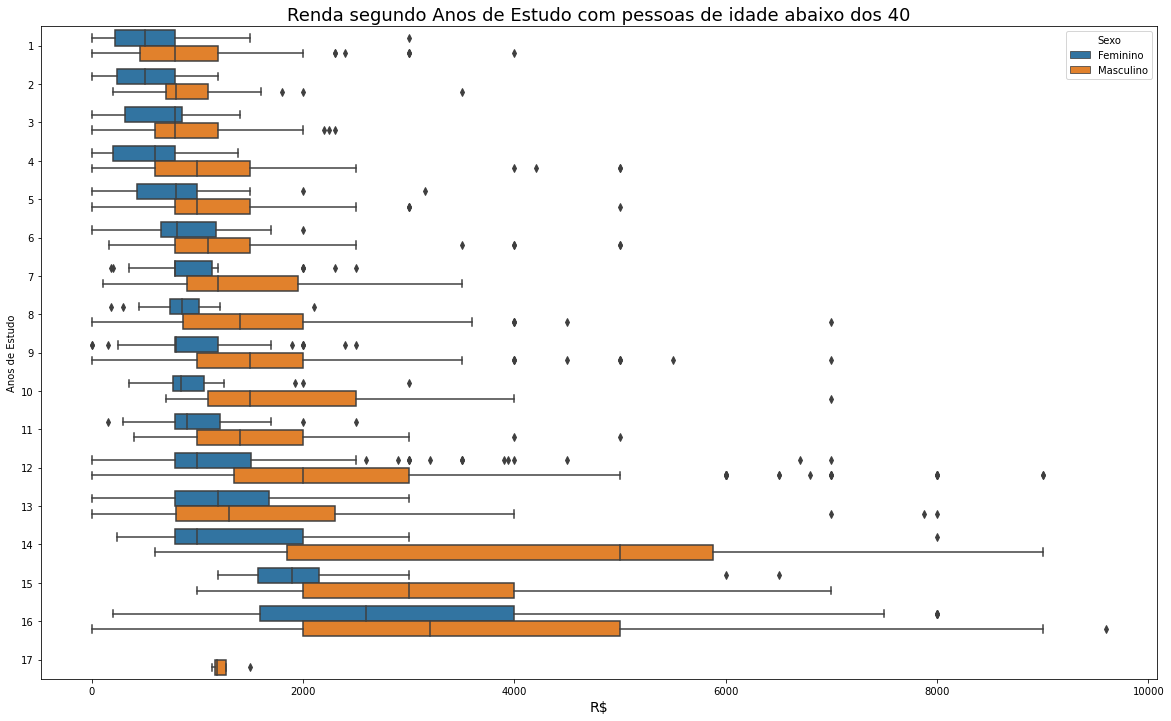

In [394]:
#Plotando boxplot da renda, porem abaixo dos 10mil e divido por sexo
ax = sns.boxplot(x= 'Renda', y='Anos de Estudo', hue='Sexo', data= dados.query('Renda < 10000 and Idade == 50'), orient='h')
ax.figure.set_size_inches(20,12)
ax.set_title('Renda segundo Anos de Estudo com pessoas de idade abaixo dos 40', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Pessoas com idade igual a 50 anos, com renda mais alta, abaixo dos 10mil, estudaram 14 anos e nesse caso sao homens, em todos os casos com renda superior

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [380]:
dados.UF = dados.UF.map(uf)
dados.Cor = dados.Cor.map(cor)
dados.Sexo = dados.Sexo.map(sexo)

In [381]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,Rondônia,Masculino,23,Parda,12,800,1.603808
1,Rondônia,Feminino,23,Branca,12,1150,1.739790
2,Rondônia,Feminino,35,Parda,15,880,1.760444
3,Rondônia,Masculino,46,Branca,6,3500,1.783158
4,Rondônia,Feminino,47,Parda,9,150,1.690631


In [382]:
dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                            
                            mean median     max          std
UF                                                          
Acre                 1506.091782    900   30000  2276.233415
Alagoas              1144.552602    788   11000  1237.856197
Amapá                1861.353516   1200   15580  2020.688632
Amazonas             1445.130100    900   22000  1757.935591
Bahia                1429.645094    800  200000  3507.917248
Ceará                1255.403692    789   25000  1821.963536
Distrito Federal     4241.954722   2000  100000  5550.463338
Espírito Santo       2026.383852   1274  100000  3513.846868
Goiás                1994.580794   1500   30000  2221.933065
Maranhão             1019.432009    700   30000  1887.816905
Mato Grosso          2130.652778   1500   35000  2542.630178
Mato Grosso do Sul   2262.604167   1500   42000  3031.419122
Minas Gerais         2056.432084   1200  100000  3584.721547
Paraná               2493.870753   1500  200000  4302.937995
Paraíba              1293.370487    788   30000  1950.272431
Pará                 1399.076871    850   50000  2053.779555
Pernambuco           1527.079319    900   50000  2389.622497
Piauí                1074.550784    750   40000  2373.355726
Rio Grande do Norte  1344.721480    800   15500  1651.805500
Rio Grande do Sul    2315.158336   1500   35000  2913.335783
Rio de Janeiro       2496.403168   1400  200000  5214.583518
Rondônia             1789.761223   1200   50000  2406.161161
Roraima              1783.588889   1000   20000  2079.659238
Santa Catarina       2470.854945   1800   80000  3137.651112
Sergipe              1109.111111    788   16000  1478.997878
São Paulo            2638.104986   1600   80000  3503.777366
Tocantins            1771.094946   1000   60000  2934.590741

### box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º -  informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Renda dos estados abaixo dos 10mil'}, xlabel='R$', ylabel='UF'>

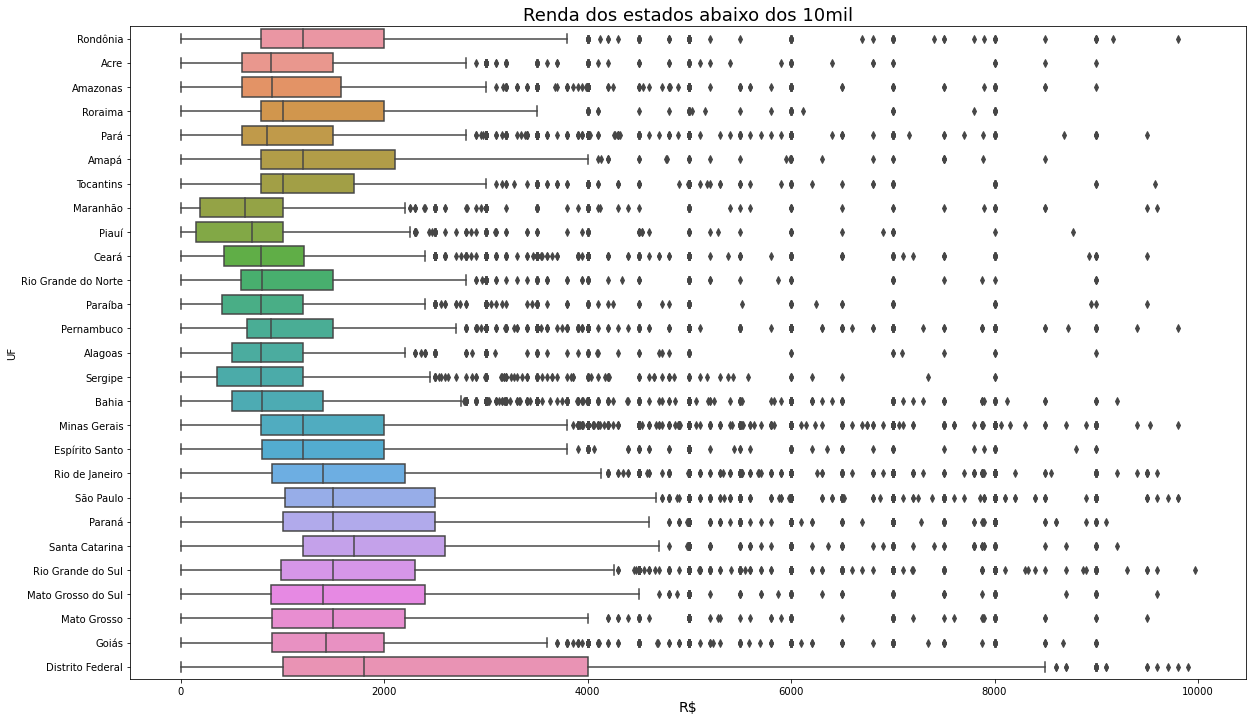

In [383]:
#Plotando boxplot da renda, porem abaixo dos 10mil e divido por sexo
ax = sns.boxplot(x= 'Renda', y='UF', data= dados.query('Renda < 10000'), orient='h')
ax.figure.set_size_inches(20,12)
ax.set_title('Renda dos estados abaixo dos 10mil', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

> ### Conclusões

Podemos observar que a renda abaixo dos 10mil esta no estado do Distrito Federal